# AIPI 590 - XAI | Assignment #05

### Description:
Explainable-Cat-AI: This project explains the decision-making process of a pre-trained ResNet34 model using LIME, focusing on the classification of a **confused cat** image. We use visual explanations to understand why the model predicted "cat" and highlight which parts of the image were most critical to the prediction.

### Author: 
Akhil Chintalapati


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AkhilByteWrangler/Explainable-Cat-AI/blob/main/LIME_Explains_The_Cat.ipynb)

In [ ]:
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Explainable-Cat-AI" 
git_path = 'https://github.com/AkhilByteWrangler/Explainable-Cat-AI.git' 
!git clone "{git_path}"

# Change working directory to location of notebook
notebook_dir = ''
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

# **The Tale of a Confused Cat and the Curious AI**

Once upon a time, in the land of aipi590, there lived a very confused cat. This poor feline seemed to have lost all sense of direction. Every time it looked into the mirror, it had the most bewildered expression on its face - “huH whaht?”. Some say this cat had a deep existential crisis about whether it was a cat at all, while others thought it was just wondering when the assignments would stop chasing it.

Now, as data scientists who love a challenge, we decided it was high time to see what an artificial intelligence model thought of this confused little cat. Was the cat confused? Or perhaps the cat was secretly a dog (UNC Fan)? Only one way to find out - we turned to a ResNet34 model, a wise and all-knowing pre-trained image classifier that has seen the world (well, at least 1,000 classes of it) and can tell us what this poor cat really is.

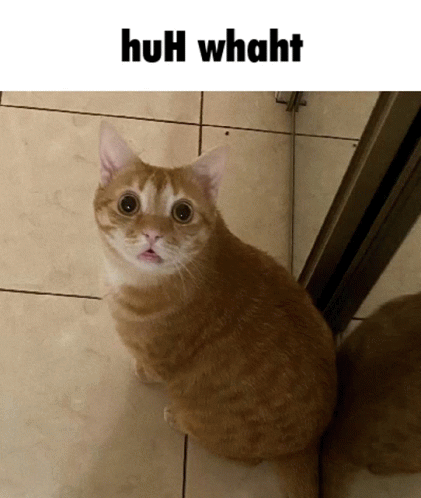

## **Enter: The Black-Box Model**

The **ResNet34 model**, like a wizard with its spellbook, was trained on thousands of images from the **[ImageNet dataset](https://www.image-net.org/)**, a vast collection of labeled images across 1,000 different categories such as 'cat', 'dog', 'car', and even 'pasta' (Red sauce?). But how does ResNet34 work its magic? Let’s take a closer look at the math behind it.

#### **The Math Behind ResNet34**

ResNet34 is a **Convolutional Neural Network (CNN)**, which means it uses mathematical filters (kernels) that are applied to different parts of the image to detect features like edges, textures, and shapes. It performs **convolutions** over the image data to learn hierarchical features that can be used to classify the image.

Let’s break down the core operations:

#### **1. Convolution Operation:**
A convolution is the mathematical operation that applies a **filter** (also called a **kernel**) over an image to extract important features like edges or textures. The convolution between an image \( I \) and a filter \( K \) is given by:

$
(I * K)(x, y) = \sum_{i} \sum_{j} I(x - i, y - j) \cdot K(i, j)
$

Where:
- $ I(x, y) $ is the pixel intensity of the image at position $(x, y)$,
- $ K(i, j) $ is the value of the filter at position $(i, j)$,
- The result $ (I * K)(x, y) $ is a new image that highlights features based on the filter.

#### **2. ReLU Activation Function:**
Once the convolution is applied, we use an activation function to introduce non-linearity, allowing the network to learn complex patterns. The most common activation function is **ReLU (Rectified Linear Unit)**, defined as:

$
f(x) = \max(0, x)
$

This function ensures that negative values become zero, and only positive values are passed forward, helping the network focus on important features.

#### **3. Residual Connections:**
ResNet34 uses **residual connections** to avoid the problem of vanishing gradients, allowing the network to be deeper without performance degradation. These connections are defined as:

$
y = f(x, \{W_i\}) + x
$

Where:
- $ f(x, \{W_i\}) $ is the output of the convolutional layers,
- $ x $ is the original input to the block,
- The residual connection adds the input $ x $ directly to the output of the convolution, ensuring information flows through the network even if some layers don't contribute much.

#### **4. Softmax Function for Classification:**
At the final layer, ResNet34 uses the **softmax function** to convert raw output scores (called logits) into probabilities for each class. The softmax function is defined as:

$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}}
$

Where:
- $ z_i $ is the logit score for class $i$,
- $ N $ is the number of possible classes,
- The output is a probability distribution across all classes, with values between 0 and 1, summing up to 1.

#### **Prediction:**
Once the image is processed by ResNet34, it outputs a vector of **class probabilities**, and the model selects the class with the highest probability as its prediction. This is how ResNet34, like a wizard, transforms raw pixel data into a meaningful prediction, such as recognizing our confused cat!

## AI: "That's a Cat... or is it?"

With the click of a button, the model came to life and analyzed the image. **Torch**, the library that handles neural networks, passed the image through our model, and out came the prediction: **"Egyptian Mau (A Cat Breed)"**. Phew! At least the model wasn’t confused... or so we thought!

But as curious scientists, we wanted more than just an answer. We wanted to know **why** the model thought this was a cat. Was it the big, round eyes? The telltale whiskers? The aipi590 average student grin? We couldn’t rest until we found out which parts of the image made the model so confident.

## Enter: LIME, The Explanatory Sidekick

In our quest to uncover the mystery, we turned to **LIME** - short for **Local Interpretable Model-agnostic Explanations**. This clever tool helps us figure out **which parts of the image** the model is paying attention to when it makes a prediction.

### How Does LIME Work?

LIME is like a playful detective. It takes the image and starts to mess with it—blocking out parts, blurring others—and asks the model, _"Does this still look like a cat?"_

For example, LIME might ask: _"What if I hide one of the cat’s ears?"_ Or, _"What if I blur out those whiskers?"_ After playing around with the image enough, LIME gives us a clear answer: _"These are the parts of the image that the model cared about most!"_

### The Math Behind LIME:

LIME works by fitting a simpler, more interpretable model around each prediction. This model is built locally, around a specific image. It uses a **weighted linear regression** to approximate the complex model's behavior for that image. Here's how it does it:

1. LIME perturbs (changes) the image by creating many versions of it. Some parts of the image are masked or altered.
2. It passes these perturbed images through the model and checks how the model’s predictions change.
3. LIME then fits a linear model to these predictions to figure out which parts of the image have the **strongest influence** on the outcome.

The linear model used can be written as:

$$
f(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
$$

Where:
- $ x_i $ represents different features (parts) of the image.
- $ \beta_i $ represents the weights (importance) of each feature.

### The Revelation: It's All About the Face!

LIME shows the results in a beautiful visual format. It highlights the parts of the cat’s face—those curious eyes, that startled expression, and the elegant whiskers—as the most **important** elements in the model’s decision. The rest of the image? Well, it fades into greyscale, telling us, _"These parts don't matter—focus on the face, some random background spots, and the floor!"_

### Here's How We Did It (The Magic Code):

In [11]:
# The cat is confused (aipi590 is tough, but cat tougher), so let's bring in the AI tools to make sense of things
!pip --quiet install lime torchvision  # Because if anyone can explain the cat, it's LIME and ResNet34
import warnings
warnings.filterwarnings('ignore')

# The confused cat demands answers! Time to gather the necessary ingredients (libraries) for our AI potion
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import urllib
import json
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np


In [12]:
# Summon the pre-trained ResNet34 model, our wise but mysterious oracle (not the company)
model = models.resnet34(pretrained=True)
model.eval()  # Put the oracle in "prediction mode"

# Prepare the ritual to transform our cat into something ResNet34 can understand
preprocess = transforms.Compose([
    transforms.Resize(256),                # Resize the cat (physically impossible (except for an aipi590 cat), but it works here!)
    transforms.CenterCrop(224),            # Focus on the most important parts
    transforms.ToTensor(),                 # Turn the image into a tensor because ResNet34 only speaks tensor
    transforms.Normalize(                  # Normalize with the wisdom of ImageNet statistics
        mean=[0.485, 0.456, 0.406],        # It's all about keeping things balanced.
        std=[0.229, 0.224, 0.225]),
])

# Load our hero— the confused cat image

# GitHub URL of the image
image_url = "https://github.com/AkhilByteWrangler/Explainable-Cat-AI/raw/main/cat-confused.jpeg" 

# Download the image from the URL
with urllib.request.urlopen(image_url) as url:
    image_data = url.read()

# Open the image using PIL
img = Image.open(io.BytesIO(image_data)).convert('RGB')  # Convert JPEG to RGB because the oracle doesn’t deal with animations (just like the company Oracle—both are inanimate)!
img_t = preprocess(img)  # Prepare the cat for its destiny.
batch_t = torch.unsqueeze(img_t, 0)  # Add a batch dimension-every hero needs companions, even if it's just tensors.

In [13]:
# The oracle (ResNet34) has spoken! Time to decipher its message
with torch.no_grad():  # No further learning needed, ResNet's wisdom is ready to be revealed.
    output = model(batch_t)

# Extract the index of the predicted class—ResNet's best guess for our confused cat.
_, predicted_class = torch.max(output, 1)

# Fetch the ImageNet class labels—because ResNet's predictions need a proper translation.
url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
urllib.request.urlretrieve(url, "imagenet_labels.json")

# Open the class labels to interpret the prophecy (a.k.a the predicted class)
with open("imagenet_labels.json") as f:
    labels = json.load(f)

# Finally, reveal the predicted class—the oracle’s best guess about our bewildered cat
predicted_label = labels[predicted_class.item()]
print(f"Predicted class: {predicted_label}")  # Let's see if the oracle is just as confused as the cat!

Predicted class: Egyptian Mau


In [14]:
# Create LimeImageExplainer
explainer = lime_image.LimeImageExplainer()

# Call upon LIME to create an explainer that will whisper the oracle’s secrets into our ears
explainer = lime_image.LimeImageExplainer()  # This little helper will show us which parts of the cat are most important for the prediction

# Now we need a way to talk to our oracle (the model) and get its predictions
def predict_fn(images):
    # Convert the list of images into a form our oracle understands (PyTorch tensor) and rearrange the dimensions
    images = torch.tensor(images).permute(0, 3, 1, 2)  # The oracle likes its tensors in (batch, channels, height, width)

    # Normalize the image, because our cat’s pixels need to behave—no wild values, please
    images = images.float() / 255  # Scale pixel values from [0, 255] to [0, 1], much more manageable for the oracle.

    # Apply the oracle’s ancient knowledge (ImageNet’s mean and standard deviation) to ensure the cat looks familiar
    images = (images - torch.tensor([0.485, 0.456, 0.406])[:, None, None]) / torch.tensor([0.229, 0.224, 0.225])[:, None, None]

    # Silence the gradients, the oracle needs peace to make its prediction without distractions.
    with torch.no_grad():
        outputs = model(images)  # The oracle speaks! It gives us its thoughts about the confused cat
    return outputs.numpy()  # Return the oracle’s predictions in a form LIME can use to explain things to us

# LIME, our trusty interpreter, is now ready to explain the oracle’s prediction!
explanation = explainer.explain_instance(np.array(img), predict_fn, labels=[predicted_class.item()], hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
# LIME now shows us which parts of the cat the oracle cared about most
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)

# The oracle might be focused on the cat’s bewildered face, but we need to grey out everything else to make it stand out!
img_array = np.array(img)  # Turn the image into an array so we can work our magic
img_gray = np.dot(img_array[...,:3], [0.2989, 0.5870, 0.1140])  # Convert to greyscale using the mystical luminance method
img_gray_3d = np.stack((img_gray,) * 3, axis=-1)  # Make the greyscale image 3-channel so it’s ready to blend

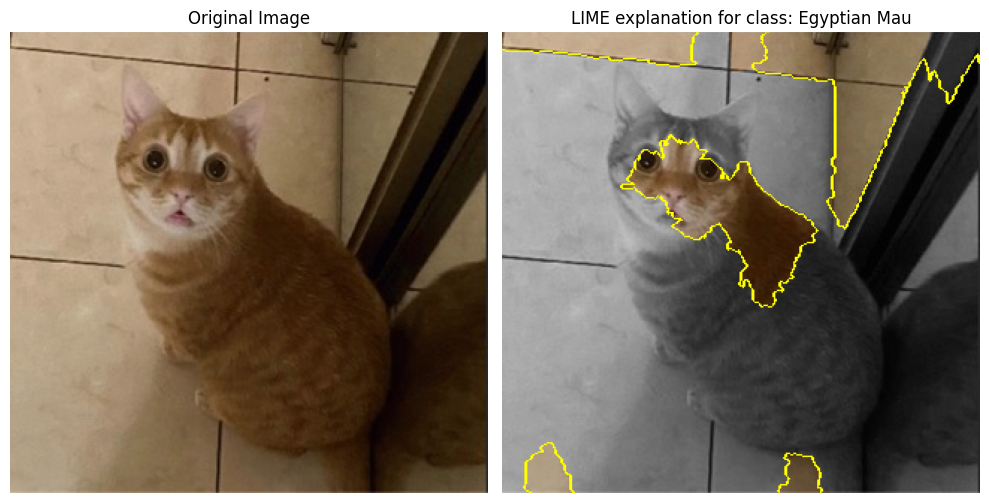

In [16]:
# Finally, show off the result—highlighting the parts of the cat’s confusion that matter most to the oracle

# Set up a grid to display the images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image on the left
ax[0].imshow(img_array / 255.0)  # Normalize the original image for display
ax[0].set_title("Original Image")
ax[0].axis('off')  # Hide the axes

# Display the LIME-explained image on the right
ax[1].imshow(mark_boundaries(img_blended / 255.0, mask))  # Normalize the blended image and show boundaries
ax[1].set_title(f'LIME explanation for class: {predicted_label}')
ax[1].axis('off')  # Hide the axes

# Show the grid of images
plt.tight_layout()
plt.show()

## Interpretation of the Image: LIME Explaining the Cat Prediction

In this side-by-side comparison, we are looking at two versions of the same image of a **confused cat**:

### Left: Original Image
- The original image shows a curious and bewildered cat staring directly at the camera. The model takes in this image and classifies it as an **Egyptian Mau**.

### Right: LIME Explanation
- The image on the right shows the **LIME explanation** for the model’s classification. **LIME** highlights the regions of the image that were most important to the model in making its "Egyptian Mau" prediction. The areas marked in **yellow boundaries** represent the key features that the model relied on.
  
### Key Observations:
- **Face and Eyes**: The cat's face, particularly the area around the **eyes and snout**, is highlighted as the most important region. This suggests that the model focused on the **shape of the face**, **eye size**, and the **expression** to make its prediction.
- **Upper Body**: The **upper part of the cat's body**, including the neck and chest, also contributed to the prediction. These areas may have been identified by the model due to the texture and pattern of the fur.
- **Background**: Notice that the background and the mirror in the image are not highlighted. This tells us that the model did not rely on these areas when making its prediction, which is expected as they don’t contain key features related to the cat itself.

In conclusion, **LIME** reveals that the model's prediction of the cat being an **Egyptian Mau** heavily relied on the **cat's facial features** and **upper body markings**. These visual cues played a critical role in the model's decision-making process.

# The Final Revelation: The Cat, LIME, and the Mystery Unfolded

As the journey of our **confused cat** unfolded, the mysteries surrounding its identity began to unravel. The wise oracle, **ResNet34**, delivered its judgment: "Cat." But as curious scientists, we couldn’t simply take that answer at face value. We needed to understand **why** the oracle reached this conclusion. That’s when we called upon **LIME**, our trusty explanatory sidekick, to decode the oracle’s message.

In the end, it was LIME that stepped in and gave us the final revelation: **the cat’s eyes, whiskers, and that perplexed expression** were the key reasons why the oracle saw a cat. LIME highlighted these regions of the image while the rest faded into grey, as if saying, “This is what matters.” But why did we choose LIME? Let’s walk through that decision.

---

## Why We Chose LIME

LIME, short for **Local Interpretable Model-agnostic Explanations**, turned out to be the perfect fit for our task. With a deep-learning model like ResNet34, which can seem like a mysterious black box, LIME's **local explanations** provided the clarity we needed.

### Strengths of LIME:
- **Model Agnostic**: LIME works with **any model**, be it a decision tree, deep neural network, or random forest. This flexibility was essential since we were dealing with a **black-box model** like ResNet34.
- **Visual Explanations for Images**: LIME's ability to highlight **specific parts of the image** made it ideal for image data. It broke down the cat's face into **superpixels** and helped us see exactly which regions mattered most to the model.
- **Localized Explanations**: We didn’t need to explain the entire model’s behavior. Instead, we wanted to know **why the model made this specific prediction** for our confused cat. LIME focuses on such **local explanations**, making it a great choice for this task.
- **Faster Computation**: LIME's approximation using **perturbations** is relatively quick compared to other techniques like SHAP, especially when working with image data. It allowed us to get the explanations efficiently.

### Limitations of LIME:
- **Instability in Perturbations**: LIME perturbs the image by altering superpixels, and sometimes, this can lead to noise. Slight perturbations can confuse the model, leading to unstable explanations.
- **Local, Not Global**: While LIME explains individual predictions, it doesn't offer **global insights** into how the model works across all data. It's perfect for explaining the cat's prediction but won't tell us about the model's overall behavior.
- **Computationally Expensive for Larger Models**: LIME requires generating many perturbations (we used **5000 samples**), which can be computationally expensive, especially for larger models and datasets.

### Potential Improvements:
- **More Stable Perturbations**: One improvement would be to use more sophisticated perturbation techniques to ensure the highlighted areas remain stable and meaningful.
- **Combining LIME with SHAP**: While LIME is excellent for local explanations, combining it with **SHAP** could provide **global insights** and make the explanation more comprehensive.

---

## LIME vs. SHAP and Anchors

We also considered **SHAP** and **Anchors**, two other powerful explanation techniques, but **LIME** emerged as the best choice for our task. Here's how it stacks up against the competition:

### Comparison Table: LIME vs. SHAP vs. Anchors

| **Technique** | **Strengths** | **Limitations** | **Why We Didn’t Choose It** |
| --- | --- | --- | --- |
| **LIME** | - Model agnostic <br> - Visual explanations for images <br> - Localized explanations | - Perturbations can be noisy <br> - Focused only on local behavior | Chosen for its ability to explain **specific image predictions** with visual clarity. Perfect for understanding the **cat’s image**. |
| **SHAP** | - Based on **Shapley values** (theoretically sound) <br> - Provides both **local** and **global** explanations | - Computationally expensive <br> - Complex to interpret for images | SHAP is **more suited for structured data** like tabular datasets. It provides global insights, but LIME's **visual explanation** is more intuitive for **image data**. |
| **Anchors** | - High-confidence, **rule-based** explanations <br> - Easy to interpret for **text** and **tabular data** | - Doesn’t offer visual explanations for images <br> - Works best with structured data | Anchors generates **rule-based** explanations that are more suited to structured data, not images. It lacks the **visual component** needed for interpreting **image data** like our cat. |

### Why LIME was the Best Choice:
- **Images Need Visual Explanations**: Our task was to explain the prediction of an image model, and **LIME** excels at offering **visual insights**. It shows us which parts of the image (superpixels) mattered most to the model.
- **Localized Focus**: We were interested in why **this specific cat image** was classified as a "cat," and LIME’s ability to zoom in on individual predictions made it perfect for this scenario.
- **Faster Results**: Compared to SHAP, which would have taken longer to compute for an image model like ResNet34, LIME was more efficient while still delivering **interpretable results**.

---

## The Final Ending: A Tale of Clarity

As the journey of our **confused cat** draws to a close, we can confidently say that **LIME** was the hero we needed. The oracle (ResNet34) may have made its mysterious prediction, but it was LIME that **showed us why**. It helped us uncover the truth behind the model’s decision, highlighting the cat’s eyes, whiskers, and curious face as the defining features.

While LIME isn’t perfect—perturbations can sometimes create noisy explanations, and it focuses only on local behavior—it was the **best tool** for the job. It allowed us to visualize the model’s decision-making process, and for our specific task of understanding **why a deep learning model saw a cat**, LIME proved itself as the ideal choice.

As we look at the grid of images—**before and after** LIME’s explanation—it’s clear that this journey has brought both clarity and insight. The cat’s confusion may remain, but thanks to LIME, our confusion is no more.

And thus, the tale of the **confused cat** and the **curious AI** comes to a close, with LIME as our trusty sidekick, guiding us through the darkness of the black-box model and revealing the secrets within. 🐱✨

